Valor de la propina: 
18.482738780207143


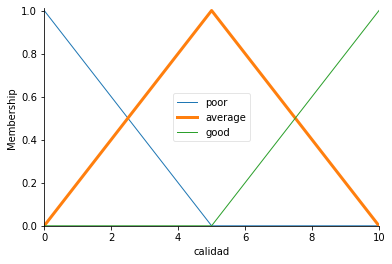

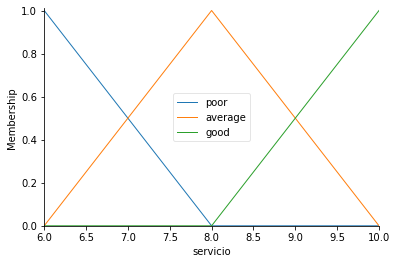

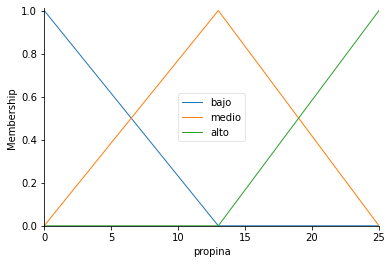

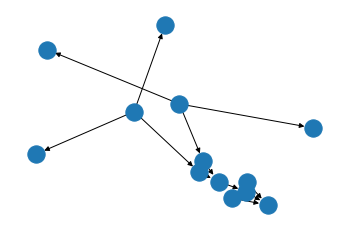

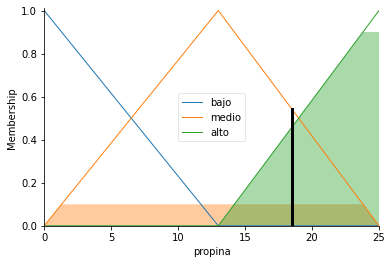

In [9]:
# CONTROL DIFUSO API.
# ELimina Las advertencias 
import warnings 
warnings.filterwarnings('ignore') 
# Importa Las Librerias 
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
%matplotlib inline 

# Se creep Los objetos antecedentes y consecuente a partir de Las 
# variables deL universo y Las funciones de membresio 
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad') 
servicio = ctrl.Antecedent(np.arange(6, 11, 1), 'servicio') 
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina') 
# La pobLacidn de La funcidn de membresio automatics es posible con .automf (3, 5 0 7) 
calidad.automf(3) 
servicio. automf(3) 
# Las funciones de membresia personaL izadas se pueden construir interactivamente con La 
# API Pythonic 
propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 13]) 
propina['medio'] = fuzz.trimf(propina.universe, [0, 13, 25]) 
propina['alto'] = fuzz.trimf(propina.universe, [13, 25, 25]) 

# VisuaLizacion con .view() 
calidad['average'].view() 
servicio.view() 
propina.view() 
# Creacion an Los regLas 
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo']) 
regla2 = ctrl.Rule(servicio['average'], propina['medio']) 
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto']) 
# VisuaLizacian de La regLa 1 
regla1.view() 
# Generacian deL simuLador 
control_propina = ctrl.ControlSystem([regla1, regla2, regla3]) 
asignacion_propina = ctrl.ControlSystemSimulation(control_propina) 

#Pasar entradas al ControlSystem usando etiquetas 'Antecedent' con Pythonic API 
#Nota: si quiere pasar muchas entradas a La vez, usar .inputs (dict of data) 
asignacion_propina.input['calidad'] = 6.5 
asignacion_propina.input['servicio'] = 9.8 
#A Se obtiene el valor 
asignacion_propina.compute() 
#Se muestro La informacion 
print("Valor de la propina: ") 
print (asignacion_propina.output['propina']) 
#A Se muestra La curvo de asignacion de propina 
propina.view(sim=asignacion_propina) 

